In [2]:
'''
todo:
    - median i.p.v. mean?
    
''';

# Freesound pitch estimation assessment
In this document the results of the assessment of the Freesound pitch estimation algorithm will be presented and discussed.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import essentia as ess
import essentia.standard as estd

from loadResults import *  # load results
import pEstAssess as pa    # some functions to mangle the results

read 7695 lines of Freesound data
read 7695 lines of Freesound soundfile data
read 3982 lines of non-Freesound soundfile data
Total amount of sounds assessed: 11677


## 1: Method
The pitch estimation is assessed in two different manners: one uses the data calculated by Freesound at the moment a sound is uploaded; the other will be using the data calculated locally after downloading sounds from both Freesound and other sources.

### 1.1: The sounds
The sounds that are used come, as stated above, from Freesound and some non-Freesound sources. The sounds used from Freesound come from three different sources: the users Carlos Vaquero and Modular Samples and the soundpacks containing the tag: 'good-sounds'. The non-Freesound sounds come from sources mentioned in the masterthesis '$TITLE$' of Carlos Vaquero [$REF$], namely sounds from the Philharmonia Orchestra [$REF$] and the piano pack from The University of Iowa Musical Instrument Samples (or as they call it MIS) [$REF$]. 

### 1.1.1: Contents of the soundpacks:
All of the sounds are single-note sounds from either instruments or synthesisers. The sounds from the user Carlos Vaquero are recordings from different western instruments containing for example: acoustic guitar, recorders, bassoon, several bowed instruments (played plucked, bowed and with different bowing techniques). The sounds with the tag good-sounds are also single-notes of several western instruments, but only played with a 'normal' playing technique. The sounds from the user Modular Samples are all single notes played on a digital synthesiser using different presets.
The sounds from the Philharmonia Orchestra are several (vast) collections of sounds from different instruments of the orchestra, played in a wide range of techniques. The sounds chosen here are the cello, clarinet, guitar and violin. The sounds from 
the University of IOWA contain soudns from a piano, cello, trumpet, marimba and xylophone.

Below the amount of sounds contained in each pack is shown. As well as the distribution of the annotated pitches of the sounds.

Amount of sounds per source:
Freesound:
	Carlos Vaquero:		470 sounds
	good-sounds:		113 sounds
	Modular Samples:	7112 sounds
	Total:			7695 sounds

non-Freesound:
	Philharmonia:		3343 sounds
	IOWA:			639 sounds
	Total:			3982 sounds

Total sounds:			11677 sounds



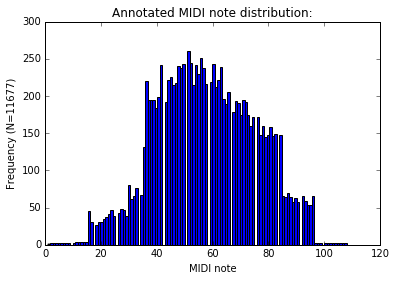

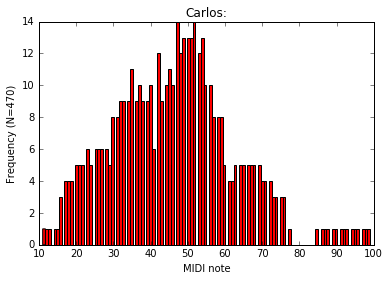

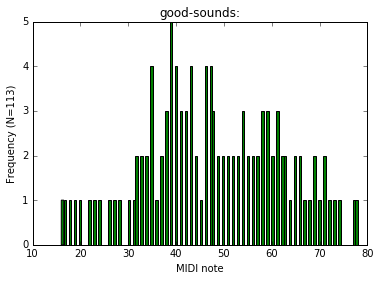

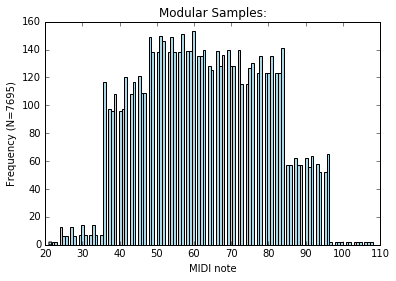

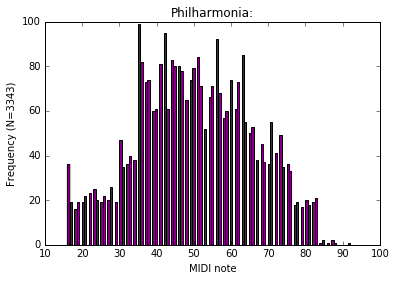

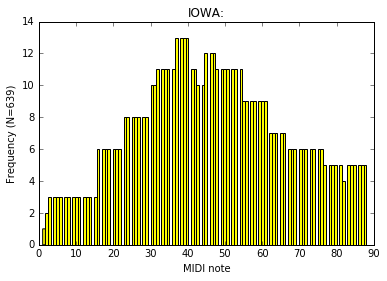

In [4]:
print "Amount of sounds per source:"
print "Freesound:"
print "\tCarlos Vaquero:\t\t" + str(csJ_N) + " sounds"
print "\tgood-sounds:\t\t" + str(gsJ_N) + " sounds"
print "\tModular Samples:\t" + str(msJ_N) + " sounds"
print "\tTotal:\t\t\t" + str(csJ_N + gsJ_N + msJ_N) + " sounds\n"

print "non-Freesound:"
print "\tPhilharmonia:\t\t" + str(phE_N) + " sounds"
print "\tIOWA:\t\t\t" + str(iwE_N) + " sounds"
print "\tTotal:\t\t\t" + str(phE_N + iwE_N) + " sounds\n"

print "Total sounds:\t\t\t" + str(csJ_N + gsJ_N + msJ_N +phE_N + iwE_N) + " sounds\n"

plt.hist(ESS_midi, bins=120); plt.title("Annotated MIDI note distribution:"); plt.xlabel("MIDI note"); plt.ylabel("Frequency (N=11677)"); plt.show();
plt.hist(csE_midi, bins=120, color='red'); plt.title("Carlos:"); plt.xlabel("MIDI note"); plt.ylabel("Frequency (N=470)"); plt.show()
plt.hist(gsE_midi, bins=120, color='green'); plt.title("good-sounds:"); plt.xlabel("MIDI note"); plt.ylabel("Frequency (N=113)"); plt.show()
plt.hist(msE_midi, bins=120, color='lightblue'); plt.title("Modular Samples:"); plt.xlabel("MIDI note"); plt.ylabel("Frequency (N=7695)"); plt.show()

plt.hist(phE_midi, bins=120, color='purple'); plt.title("Philharmonia:"); plt.xlabel("MIDI note"); plt.ylabel("Frequency (N=3343)"); plt.show()
plt.hist(iwE_midi, bins=120, color='yellow'); plt.title("IOWA:"); plt.xlabel("MIDI note"); plt.ylabel("Frequency (N=639)"); plt.show()


### 1.1.2: Sampling of the soundpacks:
What clearly stands out is that most of the sounds come from the user Modular Samples and the Philharmonia library. As the results of the pitch estimation can be dependent on the characteristics of the types of sounds and the manner in which they are recorded, the results can be influenced heavily by the characteristics and recording manner of these sounds. For this reason the error values of the Modular Samples and Philharmonia sounds will be averaged over several samples taken from all their sounds.

# $DO-THE-SAMPLING$


## 1.2: Assessment
The Freesound pitch estimation is done using the pitchYinFFT algorithm contained in the Essentia library [$REF$]. The pitchYinFFT is a optimalisation for reduced calculation time of the YIN algorithm. The performance of the pitch estimation algortihm will be assessed by comparing the pitch estimated by the algorithm against the pitch annotated for that sound, taken either from the filename of the descriptions and/or tags of the sounds.

# 2: Results
Firstly the results of the local calculation of the pitches will be compared with the data calculated by Freesound. Seconly, the correctness of the pitch estimations will be investigated  Lastly some possible factors which can predict the correctness of the estimation will be discussed, thus investigating possible improvements. The confidence measurements from the pitchYinFFT algorithm and the annotated pitches will be compared to the succes of the estimations and the values of some aural and musical descriptors will be correlated to the error values obtained in the assessment.


## 2.1: Comparison of Freesound and locally calculated data
The data is computated locally, trying to reproduce the data obtained from Freesound. The method used at uploadtime in Freesound is reproduced locally. Ideally the values obtained trough local calculation and central calculation at uploadtime will be the same, although some small differences may occur. Below are the differences obtained between the Freesounddata and the locally calculated data.

Freesound data versus local conmputed data:
Total difference in annotated pitches:	0.0 Hz

Estimated pitches:
	Freesound:	μ: 502.847006379Hz	Local:	μ: 489.411388006Hz
			(σ: 533.490677352Hz)		(σ: 511.757438985Hz)
Confidence:
	Freesound:	μ: 0.721313577325	Local:	μ: 0.734029321743
			(σ: 0.210887616632Hz)		(σ: 0.210465838971Hz)
Salience:
	Freesound:	μ: 0.457803061152	Local:	μ: 0.456975001527
			(σ: 0.154638858622Hz)		(σ: 0.158912115018Hz)

Mean differences:
Mean difference in estimated pitches:	51.4108160969 Hz,	(σ: 218.202148217 Hz)
Mean difference in confidence:		0.0168802470404,	(σ: 0.0151229304953)
Mean difference in salience:		0.0286506161128,	(σ: 0.0151229304953)
Mean difference in ERB distance:	1.12774528915,		(σ: 3.1812769836)
Mean difference in semitone distance:	1.67902269563,		(σ: 4.08801581279)

Minimal and maximal values:
Estimated pitches:
	Freesound:	[53.2982961256Hz,	4418.40638258Hz]
	Local:		[51.4269912686Hz,	4469.810566Hz]
Confidences:
	Freesound:	[0.0273056276176Hz,	1.

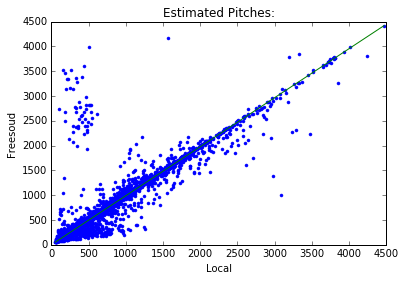

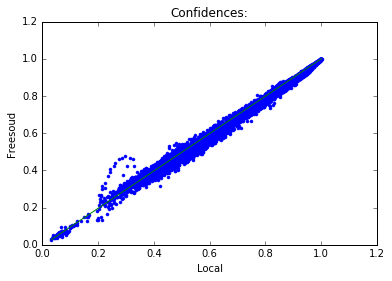

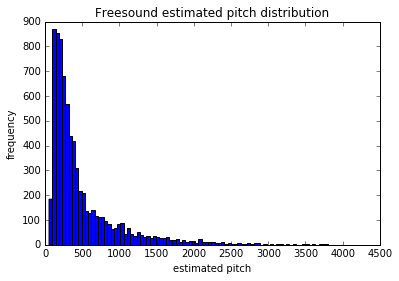

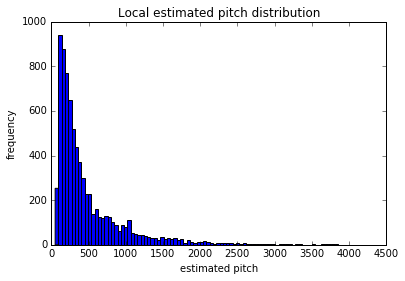

In [5]:
# compare Freesound data and locally calculated data:
print "Freesound data versus local conmputed data:"
print "Total difference in annotated pitches:\t" + str(np.sum(abs(frsJSON_pTag - frsESS_pTag))) + " Hz\n" # check whether the order of the sound is the same.

print "Estimated pitches:\n\tFreesound:\tμ: "+ str(np.mean(frsJSON_pEst)) + "Hz\tLocal:\tμ: " + str(np.mean(frsESS_pEst)) + "Hz"
print "\t\t\t(σ: " + str(np.std(frsJSON_pEst)) + "Hz)\t\t(σ: " + str(np.std(frsESS_pEst)) +"Hz)"
print "Confidence:\n\tFreesound:\tμ: " + str(np.mean(frsJSON_conf)) + "\tLocal:\tμ: " + str(np.mean(frsESS_conf))
print "\t\t\t(σ: " + str(np.std(frsJSON_conf)) + "Hz)\t\t(σ: " + str(np.std(frsESS_conf)) +"Hz)"
print "Salience:\n\tFreesound:\tμ: " + str(np.mean(frsJSON_sal)) + "\tLocal:\tμ: " + str(np.mean(frsESS_sal))
print "\t\t\t(σ: " + str(np.std(frsJSON_sal)) + "Hz)\t\t(σ: " + str(np.std(frsESS_sal)) +"Hz)\n"

frsJSON_ERB = pa.ERBdist(frsJSON_pTag, frsJSON_pEst); frsESS_ERB = pa.ERBdist(frsESS_pTag, frsESS_pEst);
frsJSON_st = pa.semitoneDist(frsJSON_pTag, frsJSON_pEst); frsESS_st = pa.semitoneDist(frsESS_pTag, frsESS_pEst);
print "Mean differences:"
print "Mean difference in estimated pitches:\t" + str(np.mean(abs(frsJSON_pEst - frsESS_pEst))) + " Hz" + ",\t(σ: " + str(np.std(abs(frsJSON_pEst - frsESS_pEst))) + " Hz)"
print "Mean difference in confidence:\t\t" + str(np.mean(abs(frsJSON_conf - frsESS_conf))) + ",\t(σ: " + str(np.std(abs(frsJSON_conf - frsESS_conf))) + ")"
print "Mean difference in salience:\t\t" + str(np.mean(abs(frsJSON_sal - frsESS_sal))) + ",\t(σ: " + str(np.std(abs(frsJSON_conf - frsESS_conf))) + ")"
print "Mean difference in ERB distance:\t" + str(np.mean(abs(frsJSON_ERB - frsESS_ERB))) + ",\t\t(σ: " + str(np.std(abs(frsJSON_ERB - frsESS_ERB))) + ")"
print "Mean difference in semitone distance:\t" + str(np.mean(abs(frsJSON_st - frsESS_st))) + ",\t\t(σ: " + str(np.std(abs(frsJSON_st - frsESS_st))) + ")\n"

print "Minimal and maximal values:"
print "Estimated pitches:"
print "\tFreesound:\t[" + str(min(frsJSON_pEst)) + "Hz,\t" + str(max(frsJSON_pEst)) + "Hz]"
print "\tLocal:\t\t[" + str(min(frsESS_pEst)) + "Hz,\t" + str(max(frsESS_pEst)) + "Hz]"
print "Confidences:"
print "\tFreesound:\t[" + str(min(frsJSON_conf)) + "Hz,\t" + str(max(frsJSON_conf)) + "Hz]"
print "\tLocal:\t\t[" + str(min(frsESS_conf)) + "Hz,\t" + str(max(frsESS_conf)) + "Hz]"
print "Saliences:"
print "\tFreesound:\t[" + str(min(frsJSON_sal)) + "Hz,\t" + str(max(frsJSON_sal)) + "Hz]"
print "\tLocal:\t\t[" + str(min(frsESS_sal)) + "Hz,\t" + str(max(frsESS_sal)) + "Hz]"

x = frsESS_pEst; y = frsJSON_pEst;
plt.plot(x, y, '.'); plt.title("Estimated Pitches:"); plt.ylabel("Freesoud"); plt.xlabel("Local"); plt.plot([min(x), max(x)], [min(y), max(y)]); plt.show();

x = frsESS_conf; y = frsJSON_conf;
plt.plot(x, y, '.'); plt.title("Confidences:"); plt.ylabel("Freesoud"); plt.xlabel("Local"); plt.plot([min(x), max(x)], [min(y), max(y)]); plt.show();

plt.hist(frsJSON_pEst, bins=100); plt.title("Freesound estimated pitch distribution"); plt.xlabel("estimated pitch"); plt.ylabel("frequency"); plt.show();
plt.hist(frsESS_pEst, bins=100); plt.title("Local estimated pitch distribution"); plt.xlabel("estimated pitch"); plt.ylabel("frequency"); plt.show();

In [6]:
print "Mean estimated pitch difference per pack:"
print "Carlos:\t\t\t" + str(np.mean(abs(csJ_pEst - csE_pEst))) + " Hz" + ",\t(σ: " + str(np.std(abs(csJ_pEst - csE_pEst))) + " Hz)"
print "Good-sounds:\t\t" + str(np.mean(abs(gsJ_pEst - gsE_pEst))) + " Hz" + ",\t(σ: " + str(np.std(abs(gsJ_pEst - gsE_pEst))) + " Hz)"
print "Modular Samples:\t" + str(np.mean(abs(msJ_pEst - msE_pEst))) + " Hz" + ",\t(σ: " + str(np.std(abs(msJ_pEst - msE_pEst))) + " Hz)\n"

print "Mean confidence difference per pack:"
print "Carlos:\t\t\t" + str(np.mean(abs(csJ_conf - csE_conf))) + ",\t(σ: " + str(np.std(abs(csJ_conf - csE_conf))) + ")"
print "Good-sounds:\t\t" + str(np.mean(abs(gsJ_conf - gsE_conf))) + ",\t\t(σ: " + str(np.std(abs(gsJ_conf - gsE_conf))) + ")"
print "Modular Samples:\t" + str(np.mean(abs(msJ_conf - msE_conf))) + ",\t\t(σ: " + str(np.std(abs(msJ_conf - msE_conf))) + ")\n"

print "Mean salience difference per pack:"
print "Carlos:\t\t\t" + str(np.mean(abs(csJ_sal - csE_sal))) + ",\t(σ: " + str(np.std(abs(csJ_sal - csE_sal))) + ")"
print "Good-sounds:\t\t" + str(np.mean(abs(gsJ_sal - gsE_sal))) + ",\t(σ: " + str(np.std(abs(gsJ_sal - gsE_sal))) + ")"
print "Modular Samples:\t" + str(np.mean(abs(msJ_sal - msE_sal)))+ ",\t(σ: " + str(np.std(abs(msJ_sal - msE_sal))) + ")\n"

print "Mean ERB distance per pack:"
csJ_ERB = pa.ERBdist(csJ_pTag, csJ_pEst); csE_ERB = pa.ERBdist(csE_pTag, csE_pEst);
print "Carlos:\t\t\t" + str(np.mean(abs(csJ_ERB - csE_ERB))) + ",\t\t(σ: " + str(np.std(abs(csJ_ERB - csE_ERB))) + ")"
gsJ_ERB = pa.ERBdist(gsJ_pTag, gsJ_pEst); gsE_ERB = pa.ERBdist(gsE_pTag, gsE_pEst);
print "Good-sounds:\t\t" + str(np.mean(abs(gsJ_ERB - gsE_ERB))) + ",\t\t(σ: " + str(np.std(abs(gsJ_ERB - gsE_ERB))) + ")"
msJ_ERB = pa.ERBdist(msJ_pTag, msJ_pEst); msE_ERB = pa.ERBdist(msE_pTag, msE_pEst);
print "Modular Samples:\t" + str(np.mean(abs(msJ_ERB - msE_ERB))) + ",\t\t(σ: " + str(np.std(abs(msJ_ERB - msE_ERB))) + ")\n"


Mean estimated pitch difference per pack:
Carlos:			12.6963153164 Hz,	(σ: 21.3211130282 Hz)
Good-sounds:		14.4762112202 Hz,	(σ: 16.5183777651 Hz)
Modular Samples:	54.5561234251 Hz,	(σ: 226.605714108 Hz)

Mean confidence difference per pack:
Carlos:			0.0155595533406,	(σ: 0.0108698961299)
Good-sounds:		0.012901073966,		(σ: 0.00954355398069)
Modular Samples:	0.017030749374,		(σ: 0.0154209541027)

Mean salience difference per pack:
Carlos:			0.0165195327063,	(σ: 0.0193645125788)
Good-sounds:		0.0164239860916,	(σ: 0.0202735816666)
Modular Samples:	0.0296465692053,	(σ: 0.0403292301654)

Mean ERB distance per pack:
Carlos:			0.442553191489,		(σ: 0.819897419855)
Good-sounds:		0.46017699115,		(σ: 0.678825094186)
Modular Samples:	1.18363329584,		(σ: 3.29502161625)



The data obtained from Freesound and the locally computated data are similar enough to focus on the locally computed data in the rest of the assessment.

## 2.2: Pitch assessment
### 2.2.1: Mean errors:
The error is calculated by subtracting the estimated pitch from the annotated pitch. As can be seen from the percentage of sounds with a higher annotated pitch than estimated pitch and the mean error value the pitch estimation algorithm does not have a tendency towards a to high or to low estimation.

Pitch distributions:


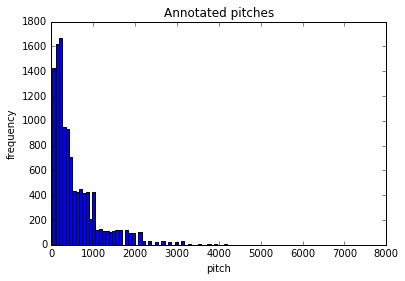

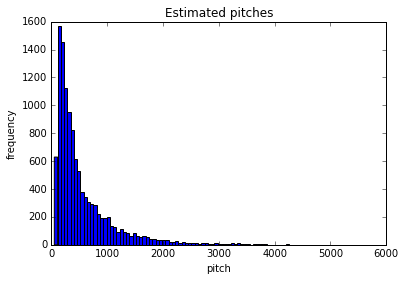

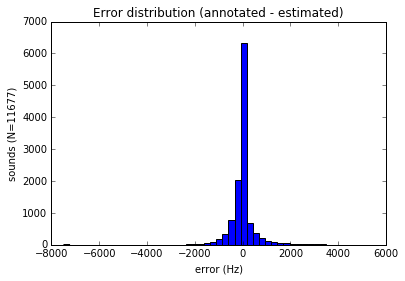

percentage of sound with annotated pitch > estimated pitch:	49.8158773658%
Mean error:							-7.46033523509 Hz,	(σ: 592.56495016 Hz)

Mean of absolute errors:					285.546960191 Hz,	(σ: 519.280088474 Hz)

Mean distances:
	in Equivalent Rectangular Bandwidths (ERBs):	6.45885073221 ERBs,	(σ: 7.33649952021 ERBs)
	in semitones:					9.26020664616 st.,	(σ: 10.4383618557 st.)


In [10]:
print "Pitch distributions:"
plt.hist(ESS_pTag, bins=100); plt.title("Annotated pitches"); plt.xlabel("pitch"); plt.ylabel("frequency"); plt.show();
plt.hist(ESS_pEst, bins=100); plt.title("Estimated pitches"); plt.xlabel("pitch"); plt.ylabel("frequency"); plt.show();


plt.hist(ESS_err, bins=50);
plt.title("Error distribution (annotated - estimated)")
plt.xlabel("error (Hz)")
plt.ylabel("sounds (N=11677)")
plt.show()
N = len(ESS_err)
print "percentage of sound with annotated pitch > estimated pitch:\t" + str(len(np.where(ESS_err > 0)[0]) / float(N) * 100) + "%"
print "Mean error:\t\t\t\t\t\t\t" + str(np.mean(ESS_err)) + " Hz,\t(σ: " + str(np.std(ESS_err)) + " Hz)\n"
print "Mean of absolute errors:\t\t\t\t\t" + str(np.mean(abs(ESS_err))) + " Hz,\t(σ: " + str(np.std(abs(ESS_err))) + " Hz)\n"

print "Mean distances:"
ESS_ERB = pa.ERBdist(ESS_pTag, ESS_pEst);
print "\tin Equivalent Rectangular Bandwidths (ERBs):\t" + str(np.mean(abs(ESS_ERB))) + " ERBs,\t(σ: " + str(np.std(abs(ESS_ERB))) + " ERBs)"
ESS_st = pa.semitoneDist(ESS_pTag, ESS_pEst);
print "\tin semitones:\t\t\t\t\t" + str(np.mean(abs(ESS_st))) + " st.,\t(σ: " + str(np.std(abs(ESS_st))) + " st.)"

In [11]:
print "Mean absolute error per pack:"
print "\tCarlos Vaquero:\t\t" + str(np.mean(abs(csE_err))) + " Hz,\t(σ: " + str(np.std(abs(csE_err))) + ") Hz"
print "\tgood-sounds:\t\t" + str(np.mean(abs(gsE_err))) + " Hz,\t(σ: " + str(np.std(abs(gsE_err))) + ") Hz"
print "\tModular Samples:\t" + str(np.mean(abs(msE_err))) + " Hz,\t(σ: " + str(np.std(abs(msE_err))) + ") Hz"
print "\tPhilharmonia:\t\t" + str(np.mean(abs(phE_err))) + " Hz,\t(σ: " + str(np.std(abs(phE_err))) + ") Hz"
print "\tIOWA:\t\t\t" + str(np.mean(abs(iwE_err))) + " Hz,\t(σ: " + str(np.std(abs(iwE_err))) + ") Hz\n"

print "Total error:\t\t\t" + str(np.mean(abs(ESS_err))) + " Hz,\t(σ: " + str(np.std(abs(ESS_err))) + ") Hz"

Mean absolute error per pack:
	Carlos Vaquero:		324.560556115 Hz,	(σ: 915.430990078) Hz
	good-sounds:		63.7242028072 Hz,	(σ: 132.896954675) Hz
	Modular Samples:	324.502255904 Hz,	(σ: 447.182775316) Hz
	Philharmonia:		197.788403323 Hz,	(σ: 541.378087422) Hz
	IOWA:			321.628922631 Hz,	(σ: 693.374528765) Hz

Total error:			285.546960191 Hz,	(σ: 519.280088474) Hz


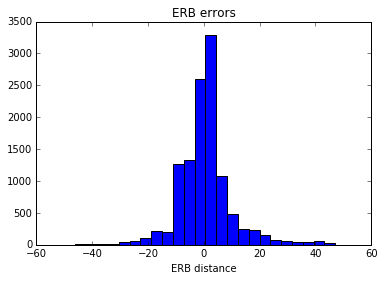

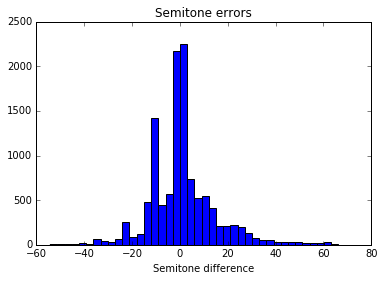

In [12]:
plt.hist(ESS_ERB, bins=25);
plt.title("ERB errors")
plt.xlabel("ERB distance")
plt.show()

plt.hist(ESS_st, bins = 40);
plt.title("Semitone errors")
plt.xlabel("Semitone difference")
plt.show()

In [13]:
i_ERB_gt_1 = np.where(abs(ESS_ERB) > 1)[0]
i_ERB_lt_2 = np.where(abs(ESS_ERB) < 2)[0]
print "Percentage of estimations with an ERB distance less than 2:\t\t" + str(len(i_ERB_lt_2) / float(N) * 100) + "%"

i_st_gt_1 = np.where(abs(ESS_st) >= 1)[0]
i_st_lt_1 = np.where(abs(ESS_st) < 1)[0]
print "Percentage of estimations with semitone distance less than 1:\t\t" + str(len(i_st_lt_1) / float(N) * 100) + "%\n"

i_ERB_gt_mu = np.where(abs(ESS_ERB) >= np.mean(abs(ESS_ERB)))[0]
i_ERB_lt_mu = np.where(abs(ESS_ERB) < np.mean(abs(ESS_ERB)))[0]
print "Percentage of estimations with an ERB distance less than mean:\t\t" + str(len(i_ERB_lt_mu) / float(N) * 100) + "% (μ:" + str(np.mean(abs(ESS_ERB))) + ")"

i_st_gt_mu = np.where(abs(ESS_st) >= np.mean(abs(ESS_st)))[0]
i_st_lt_mu = np.where(abs(ESS_st) < np.mean(abs(ESS_st)))[0]
print "Percentage of estimations with semitone distance less than mean:\t" + str(len(i_st_lt_mu) / float(N) * 100) + "% (μ:" + str(np.mean(abs(ESS_st))) + ")"



Percentage of estimations with an ERB distance less than 2:		29.2969084525%
Percentage of estimations with semitone distance less than 1:		23.4734949045%

Percentage of estimations with an ERB distance less than mean:		64.2887728012% (μ:6.45885073221)
Percentage of estimations with semitone distance less than mean:	58.0628586109% (μ:9.26020664616)


In [14]:
print "Percentages of correct estimations per pack:"
cs_ERB = pa.ERBdist(csE_pTag, csE_pEst);
cs_i_ERB_lt_2 = np.where(abs(cs_ERB) < 2)[0]; cs_i_ERB_lt_mu = np.where(abs(cs_ERB) < np.mean(abs(cs_ERB)))[0]
gs_ERB = pa.ERBdist(gsE_pTag, gsE_pEst);
gs_i_ERB_lt_2 = np.where(abs(gs_ERB) < 2)[0]; gs_i_ERB_lt_mu = np.where(abs(gs_ERB) < np.mean(abs(gs_ERB)))[0];
ms_ERB = pa.ERBdist(msE_pTag, msE_pEst);
ms_i_ERB_lt_2 = np.where(abs(ms_ERB) < 2)[0]; ms_i_ERB_lt_mu = np.where(abs(ms_ERB) < np.mean(abs(ms_ERB)))[0];
ph_ERB = pa.ERBdist(phE_pTag, phE_pEst);
ph_i_ERB_lt_2 = np.where(abs(ph_ERB) < 2)[0]; ph_i_ERB_lt_mu = np.where(abs(ph_ERB) < np.mean(abs(ph_ERB)))[0];
iw_ERB = pa.ERBdist(iwE_pTag, iwE_pEst);
iw_i_ERB_lt_2 = np.where(abs(iw_ERB) < 2)[0]; iw_i_ERB_lt_mu = np.where(abs(iw_ERB) < np.mean(abs(iw_ERB)))[0];
print "Percentage of ERB < 2:"
print "\tCarlos Vaquero:\t\t" + str(len(cs_i_ERB_lt_2) / float(csE_N) * 100) + "%"
print "\tgood-sounds:\t\t" + str(len(gs_i_ERB_lt_2) / float(gsE_N) * 100) + "%"
print "\tModular Samples:\t"  + str(len(ms_i_ERB_lt_2) / float(msE_N) * 100) + "%"
print "\tPhilharmonia:\t\t" + str(len(ph_i_ERB_lt_2) / float(phE_N) * 100) + "%"
print "\tIOWA:\t\t\t" + str(len(iw_i_ERB_lt_2) / float(iwE_N) * 100) + "%\n"

print "Percentage of ERB < mean:"
print "\tCarlos Vaquero:\t\t" + str(len(cs_i_ERB_lt_mu) / float(csE_N) * 100) + "%\t(μ:" + str(np.mean(abs(csE_ERB))) + ")"
print "\tgood-sounds:\t\t" + str(len(gs_i_ERB_lt_mu) / float(gsE_N) * 100) + "%\t(μ:" + str(np.mean(abs(gsE_ERB))) + ")"
print "\tModular Samples:\t"  + str(len(ms_i_ERB_lt_mu) / float(msE_N) * 100) + "%\t(μ:" + str(np.mean(abs(msE_ERB))) + ")"
print "\tPhilharmonia:\t\t" + str(len(ph_i_ERB_lt_mu) / float(phE_N) * 100) + "%\t(μ:" + str(np.mean(abs(ph_ERB))) + ")"
print "\tIOWA:\t\t\t" + str(len(iw_i_ERB_lt_mu) / float(iwE_N) * 100) + "%\t(μ:" + str(np.mean(abs(iw_ERB))) + ")\n"

cs_st = pa.semitoneDist(csE_pTag, csE_pEst);
cs_i_st_lt_1 = np.where(abs(cs_st) < 2)[0]; cs_i_st_lt_mu = np.where(abs(cs_st) < np.mean(abs(cs_st)))[0]
gs_st = pa.semitoneDist(gsE_pTag, gsE_pEst);
gs_i_st_lt_1 = np.where(abs(gs_st) < 2)[0]; gs_i_st_lt_mu = np.where(abs(gs_st) < np.mean(abs(gs_st)))[0];
ms_st = pa.semitoneDist(msE_pTag, msE_pEst);
ms_i_st_lt_1 = np.where(abs(ms_st) < 2)[0]; ms_i_st_lt_mu = np.where(abs(ms_st) < np.mean(abs(ms_st)))[0];
ph_st = pa.semitoneDist(phE_pTag, phE_pEst);
ph_i_st_lt_1 = np.where(abs(ph_st) < 2)[0]; ph_i_st_lt_mu = np.where(abs(ph_st) < np.mean(abs(ph_st)))[0];
iw_st = pa.semitoneDist(iwE_pTag, iwE_pEst);
iw_i_st_lt_1 = np.where(abs(iw_st) < 2)[0]; iw_i_st_lt_mu = np.where(abs(iw_st) < np.mean(abs(iw_st)))[0];
print "Percentage of st < 1:"
print "\tCarlos Vaquero:\t\t" + str(len(cs_i_st_lt_1) / float(csE_N) * 100) + "%"
print "\tgood-sounds:\t\t" + str(len(gs_i_st_lt_1) / float(gsE_N) * 100) + "%"
print "\tModular Samples:\t"  + str(len(ms_i_st_lt_1) / float(msE_N) * 100) + "%"
print "\tPhilharmonia:\t\t" + str(len(ph_i_st_lt_1) / float(phE_N) * 100) + "%"
print "\tIOWA:\t\t\t" + str(len(iw_i_st_lt_1) / float(iwE_N) * 100) + "%\n"

print "Percentage of st < mean:"
print "\tCarlos Vaquero:\t\t" + str(len(cs_i_st_lt_mu) / float(csE_N) * 100) + "%\t(μ:" + str(np.mean(abs(cs_st))) + ")"
print "\tgood-sounds:\t\t" + str(len(gs_i_st_lt_mu) / float(gsE_N) * 100) + "%\t(μ:" + str(np.mean(abs(gs_st))) + ")"
print "\tModular Samples:\t"  + str(len(ms_i_st_lt_mu) / float(msE_N) * 100) + "%\t(μ:" + str(np.mean(abs(ms_st))) + ")"
print "\tPhilharmonia:\t\t" + str(len(ph_i_st_lt_mu) / float(phE_N) * 100) + "%\t(μ:" + str(np.mean(abs(ph_st))) + ")"
print "\tIOWA:\t\t\t" + str(len(iw_i_st_lt_mu) / float(iwE_N) * 100) + "%\t(μ:" + str(np.mean(abs(iw_st))) + ")\n"





Percentages of correct estimations per pack:
Percentage of ERB < 2:
	Carlos Vaquero:		31.4893617021%
	good-sounds:		61.0619469027%
	Modular Samples:	17.7587176603%
	Philharmonia:		51.2413999402%
	IOWA:			35.6807511737%

Percentage of ERB < mean:
	Carlos Vaquero:		63.1914893617%	(μ:5.94468085106)
	good-sounds:		61.0619469027%	(μ:1.88495575221)
	Modular Samples:	58.0849268841%	(μ:7.96428571429)
	Philharmonia:		75.8899192342%	(μ:3.55339515405)
	IOWA:			70.8920187793%	(μ:6.09076682316)

Percentage of st < 1:
	Carlos Vaquero:		35.7446808511%
	good-sounds:		70.796460177%
	Modular Samples:	18.6445444319%
	Philharmonia:		57.8821417888%
	IOWA:			39.1236306729%

Percentage of st < mean:
	Carlos Vaquero:		60.2127659574%	(μ:8.28858817104)
	good-sounds:		70.796460177%	(μ:2.1005250171)
	Modular Samples:	58.5067491564%	(μ:11.895383798)
	Philharmonia:		74.2746036494%	(μ:4.10598387368)
	IOWA:			67.4491392801%	(μ:8.87662531912)



### 2.2.2: Confidence and Salience:

Mean confidence:	0.759112979937, (σ: 0.196972893496)
Mean salience:		0.441896765561, (σ: 0.161220811628)


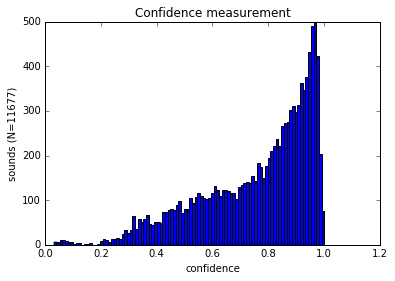

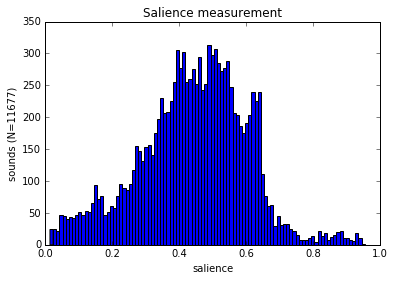

In [15]:
print "Mean confidence:\t" + str(np.mean(ESS_conf)) + ", (σ: " + str(np.std(ESS_conf)) + ")"
print "Mean salience:\t\t" + str(np.mean(ESS_sal)) + ", (σ: " + str(np.std(ESS_sal)) + ")"

plt.hist(ESS_conf, bins = 100)
plt.title("Confidence measurement")
plt.xlabel("confidence")
plt.ylabel("sounds (N=11677)")
plt.show()

plt.hist(ESS_sal, bins = 100)
plt.title("Salience measurement")
plt.xlabel("salience")
plt.ylabel("sounds (N=11677)")
plt.show()

### 2.2.3: Octave errors:
The octave errors add around 15% to the overall error:

In [16]:
print "Octave errors:"
octErr = pa.isOctErr(ESS_pTag, ESS_pEst)
print "Percentage of octave errors:\t\t" + str(len(np.where(octErr != 0)[0]) / float(len(ESS_pTag)) * 100) + "%\n"
i_XoctErr = np.where(octErr == 0);
print "Mean of absolute errors:" 
print "\tincluding octave errors:\t"+ str(np.mean(abs(ESS_err))) + " Hz,\t(σ: " + str(np.std(abs(ESS_err))) + " Hz)"
print "\texcluding octave errors:\t" + str(np.mean(abs(ESS_err[i_XoctErr]))) + " Hz,\t(σ: " + str(np.std(abs(ESS_err[i_XoctErr]))) + " Hz)"

Octave errors:
Percentage of octave errors:		14.7383745825%

Mean of absolute errors:
	including octave errors:	285.546960191 Hz,	(σ: 519.280088474 Hz)
	excluding octave errors:	263.159243062 Hz,	(σ: 536.711450868 Hz)


## 3: Predictors:
What values can predict the error rates?

## 3.1: Pre calculated
What non-descriptor values (values already calculated by the pitch estimation algorithm and the pitch salience algorithm) can predict the correctness of the estimation.

### 3.1.1: Confidence
The pitch estimation algorithm gives a confidence measurement, ideally this would be a predictor for the estimation errors. However just slightly over 50% of the correctness of the estimations are predicted correctly.

Confidence:
Percentage of sounds with a confidence above mean confidence: 60.0068510748% (μ: 0.759112979937)


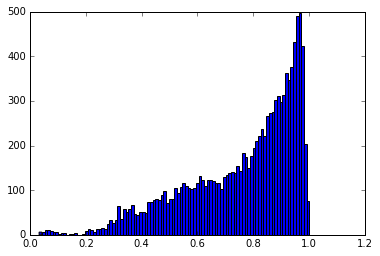

True positives:		37.4068682024%
True negatives:		19.3371585167%
False positives:	20.6559904085%
False negatives:	22.5999828723%

Correctly predicted:	56.7440267192%


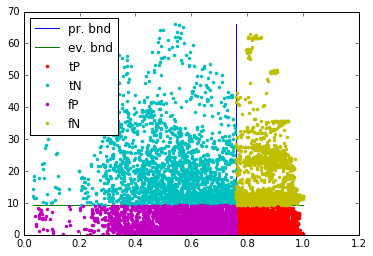

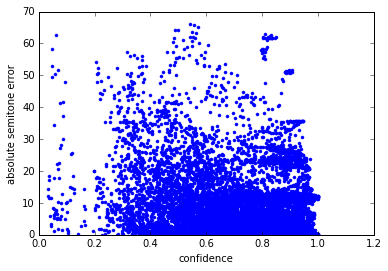

In [17]:
print "Confidence:"
i_hiConf = np.where(ESS_conf > np.mean(ESS_conf))[0]
print "Percentage of sounds with a confidence above mean confidence: " + str(len(i_hiConf) / float(N) * 100) + "% (μ: " + str(np.mean(ESS_conf)) + ")"
plt.hist(ESS_conf, bins=100); plt.show()

tP, tN, fP, fN = pa.predict(ESS_conf, ESS_st, plot=1)
print "True positives:\t\t" + str(len(tP) / float(len(ESS_st)) * 100) + "%"
print "True negatives:\t\t" + str(len(tN) / float(len(ESS_st)) * 100) + "%"
print "False positives:\t" + str(len(fP) / float(len(ESS_st)) * 100) + "%"
print "False negatives:\t" + str(len(fN) / float(len(ESS_st)) * 100) + "%\n"

print "Correctly predicted:\t" + str((len(tP) + len(tN)) / float(len(ESS_st)) * 100) + "%"

plt.show();
plt.plot(ESS_conf, abs(ESS_st), '.');
plt.xlabel("confidence"); plt.ylabel("absolute semitone error"); plt.show();

### 3.1.2: Salience
The Freesound extractor calculates a salience measurement, which will indicate how much tonal information the signal contains. In theory this could also be a predictor for the succes of the pitch estimation algorithm. However again just over 50% of the estimations can be predicted correctly.

Salience:
Percentage of sounds with a salience above mean salience: 52.4021580886%
True positives:		29.0485569924%
True negatives:		18.5835402929%
False positives:	29.0143016186%
False negatives:	23.3536010962%

Correctly predicted:	47.6320972853%


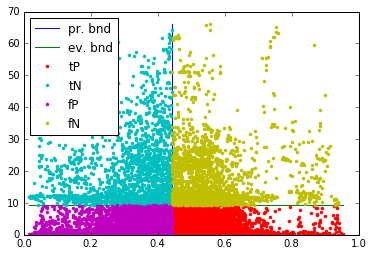

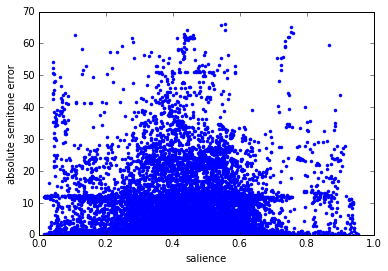

In [18]:
print "Salience:"
i_hiConf = np.where(ESS_sal > np.mean(ESS_sal))[0]
print "Percentage of sounds with a salience above mean salience: " + str(len(i_hiConf) / float(N) * 100) + "%"

tP, tN, fP, fN = pa.predict(ESS_sal, ESS_st, plot=1)
print "True positives:\t\t" + str(len(tP) / float(len(ESS_st)) * 100) + "%"
print "True negatives:\t\t" + str(len(tN) / float(len(ESS_st)) * 100) + "%"
print "False positives:\t" + str(len(fP) / float(len(ESS_st)) * 100) + "%"
print "False negatives:\t" + str(len(fN) / float(len(ESS_st)) * 100) + "%\n"

print "Correctly predicted:\t" + str((len(tP) + len(tN)) / float(len(ESS_st)) * 100) + "%"

plt.show();
plt.plot(ESS_sal, abs(ESS_st), '.');
plt.xlabel("salience"); plt.ylabel("absolute semitone error"); plt.show();

### 3.2.3: Annotated pitch:
The annotated pitches are better to predict the correctness of the estimation. By using the annotated pitches as a inverse confidence measurement around 74% of the correctness of the estimations can be accounted for.


Annotated pitch:
Percentage of sounds with a annotated pitch above mean annotated pitch: 33.7757985784%
True positives:		38.4602209472%
True negatives:		14.1731609146%
False positives:	19.6026376638%
False negatives:	27.7639804744%

Correctly predicted:	52.6333818618%


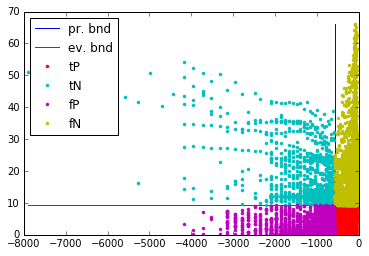

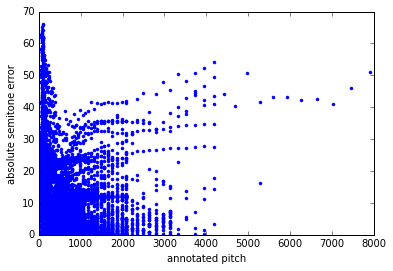

In [19]:
print "Annotated pitch:"
i_hiConf = np.where(ESS_pTag > np.mean(ESS_pTag))[0]
print "Percentage of sounds with a annotated pitch above mean annotated pitch: " + str(len(i_hiConf) / float(N) * 100) + "%"

tP, tN, fP, fN = pa.predict(ESS_pTag, ESS_st, plot=1, invPred=True)
print "True positives:\t\t" + str(len(tP) / float(len(ESS_st)) * 100) + "%"
print "True negatives:\t\t" + str(len(tN) / float(len(ESS_st)) * 100) + "%"
print "False positives:\t" + str(len(fP) / float(len(ESS_st)) * 100) + "%"
print "False negatives:\t" + str(len(fN) / float(len(ESS_st)) * 100) + "%\n"

print "Correctly predicted:\t" + str((len(tP) + len(tN)) / float(len(ESS_st)) * 100) + "%"

plt.show();
plt.plot(ESS_pTag, abs(ESS_st), '.');
plt.xlabel("annotated pitch"); plt.ylabel("absolute semitone error"); plt.show();

## 3.2: Descriptors:
What characteristics of the sounds can predict the correctness of the estimation.

In [16]:
from descriptors import *
ESS_st = pa.semitoneDist(ESS_pTag, ESS_pEst);

Spectral centroid


ValueError: x and y must have same first dimension

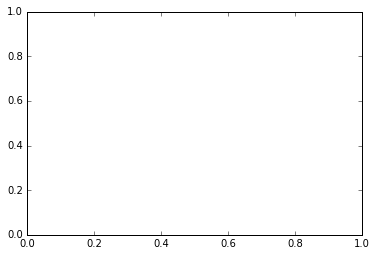

In [17]:
print "Spectral centroid"
plt.plot(pool['centroid.mean'], abs(ESS_st), '.');
plt.title("Spectral Centroid"); plt.xlabel('Mean Spectral Centroid'); plt.ylabel('Semitone error'); plt.show()
plt.plot(pool['centroid.median'], abs(ESS_st), '.');
plt.title("Spectral Centroid"); plt.xlabel('Median Spectral Centroid'); plt.ylabel('Semitone error'); plt.show()

In [144]:
print "HFC"
plt.plot(pool['hfc.mean'], abs(ESS_st), '.');
plt.title("High Frequency Content"); plt.xlabel('Mean HFC'); plt.ylabel('Semitone error'); plt.show()
plt.plot(pool['hfc.median'], abs(ESS_st), '.');
plt.title("High Frequency Content"); plt.xlabel('Median HFC'); plt.ylabel('Semitone error'); plt.show()

HFC


In [8]:
print "Flux"
plt.plot(pool['flux.mean'], abs(ESS_st), '.');
plt.title("Flux"); plt.xlabel('Mean Flux'); plt.ylabel('Semitone error'); plt.show()
plt.plot(pool['flux.median'], abs(ESS_st), '.');
plt.title("Flux"); plt.xlabel('Median Flux'); plt.ylabel('Semitone error'); plt.show()

Flux


NameError: name 'pool' is not defined

In [23]:
print "EffectiveDuration?"
plt.plot(pool['effectiveduration.mean'], abs(ESS_st), '.');
plt.title("Effective Duration"); plt.xlabel('Mean Effective Duration'); plt.ylabel('Semitone error'); plt.show()
plt.plot(pool['effectiveduration.median'], abs(ESS_st), '.');
plt.title("Effective Duration"); plt.xlabel('Median Effective Duration'); plt.ylabel('Semitone error'); plt.show()

EffectiveDuration?


In [148]:
print "LogAttackTime"
plt.plot(pool['logattacktime.mean'], abs(ESS_st), '.');
plt.title("Log Attack Time"); plt.xlabel('Mean Log Attack Time'); plt.ylabel('Semitone error'); plt.show()
plt.plot(pool['logattacktime.median'], abs(ESS_st), '.');
plt.title("Log Attack Time"); plt.xlabel('Median Log Attack Time'); plt.ylabel('Semitone error'); plt.show()

LogAttackTime


In [149]:
print "RollOff"
plt.plot(pool['rolloff.mean'], abs(ESS_st), '.');
plt.title("Roll Off"); plt.xlabel('Mean Roll Off'); plt.ylabel('Semitone error'); plt.show()
plt.plot(pool['rolloff.median'], abs(ESS_st), '.');
plt.title("Roll Off"); plt.xlabel('Median Roll Off'); plt.ylabel('Semitone error'); plt.show()

RollOff


In [151]:
print "SpectralContrast"
plt.plot(pool['spectralcontrast.mean'], abs(ESS_st), '.');
plt.title("Spectral Contrast"); plt.xlabel('Mean Spectral Contrast'); plt.ylabel('Semitone error'); plt.show();
plt.plot(pool['spectralcontrast.median'], abs(ESS_st), '.')
plt.title("Spectral Contrast"); plt.xlabel('Median Spectral Contrast'); plt.ylabel('Semitone error'); plt.show();

SpectralContrast


In [146]:
print "Inharmonicity"
plt.plot(pool['inharmonicity.mean'], abs(ESS_st), '.');
plt.title("Inharmonicity"); plt.xlabel('Mean Inharmonicity'); plt.ylabel('Semitone error'); plt.show();
plt.plot(pool['inharmonicity.median'], abs(ESS_st), '.');
plt.title("Inharmonicity"); plt.xlabel('Median Inharmonicity'); plt.ylabel('Semitone error'); plt.show();

inharmonicity


In [150]:
print "SpectralComplexity"
plt.plot(pool['spectralcomplexity.mean'], abs(ESS_st), '.');
plt.title("Spectral Complexity"); plt.xlabel('Mean Spectral Complexity'); plt.ylabel('Semitone error'); plt.show();
plt.plot(pool['spectralcomplexity.median'], abs(ESS_st), '.');
plt.title("Spectral Complexity"); plt.xlabel('Median Spectral Complexity'); plt.ylabel('Semitone error'); plt.show();

SpectralComplexity


In [22]:
print "silence? (StartStopSilence)"

silence? (StartStopSilence)


In [153]:
print "TCToTotal?"
plt.plot(pool['tctototal'], abs(ESS_st), '.');
plt.title("TC to Total"); plt.xlabel('TC to Total'); plt.ylabel('Semitone error'); plt.show();

TCToTotal?


In [152]:
print "StrongPeak"
plt.plot(pool['strongpeak.mean'], abs(ESS_st), '.');
plt.title("Strong Peak"); plt.xlabel('Mean Strong Peak'); plt.ylabel('Semitone error'); plt.show();
plt.plot(pool['strongpeak.median'], abs(ESS_st), '.');
plt.title("Strong Peak"); plt.xlabel('Median Strong Peak'); plt.ylabel('Semitone error'); plt.show();

StrongPeak


In [10]:
print "Tristimulus?"
plt.plot(pool['tristimulus.0.mean'], abs(ESS_st), '.', label='0');
plt.plot(pool['tristimulus.1.mean'], abs(ESS_st), '.', label='1');
plt.plot(pool['tristimulus.2.mean'], abs(ESS_st), '.', label='1');
plt.title("Tristumulus"); plt.xlabel('Mean Tristimulus'); plt.ylabel('Semitone error');  
plt.legend( loc='upper right', numpoints = 1 ); plt.show();

plt.plot(pool['tristimulus.0.median'], abs(ESS_st), '.', label='0');
plt.plot(pool['tristimulus.1.median'], abs(ESS_st), '.', label='1');
plt.plot(pool['tristimulus.2.median'], abs(ESS_st), '.', label='1');
plt.title("Tristumulus"); plt.xlabel('Median Tristimulus'); plt.ylabel('Semitone error');  
plt.legend( loc='upper right', numpoints = 1 ); plt.show();

Tristimulus?


NameError: name 'pool' is not defined

In [21]:
print "DynamicComplexity"
plt.plot(pool['spectralcomplexity'], abs(ESS_st), '.');
plt.title("Dynamic Complexity"); plt.xlabel('Dynamic Complexity'); plt.ylabel('Semitone error'); plt.show();

DynamicComplexity


In [145]:
print "amplitude of signal v.s. amplitude of HarmonicMask(signal)?"

amplitude of signal v.s. amplitude of HarmonicMask(signal)?


In [147]:
print "Larm? / LevelExtractor? / Loudness?"

Larm? / LevelExtractor? / Loudness?


In [155]:
print ""